## 1. 부동산 데이터 분석

+ 데이터 출처
    
    KB 부동산 리브온 - https://onland.kbstar.com/quics?page=C059735#none

### 파이썬으로 데이터 가져오기

In [3]:
# pandas.read_excel 로 엑셀 파일 읽어오기

import pandas as pd

# 아래와 같이 KB에서 받은 데이터를 디렉터리와 제목을 합쳐서 문자열로 입력
# 앞에 r을 써주면 정규식에서 중복되는걸 없애도 된다. \\를 -> \로 사용 가능
path = r'데이터\★(월간)KB주택가격동향_시계열(2020.08).xlsx'
raw_data = pd.read_excel(path, sheet_name='매매종합')

위 코드를 실행하면 일반적인 경우는 해당 파일의 '매매종합' 시트에 있는 데이터를 읽어와 데이터프레임으로 반환한다. 하지만 아래와 같은 에러가 발생 하는 경우가 있다.

XLRDError : WorkBook is encrypted

+ xlwings 모듈을 이용해 보호된 엑셀 팡리 읽어오기

엑셀 파일의 각 시트가 잠금으로 보호돼 있을 경우, 판다스의 read_excel 함수로 잠금된 엑셀 파일의 데이터를 읽어오지 못한다. 이때 xlwings라는 모듈은 보호된 엑셀 파일을 읽어올 수 있는데, 이를 활용해 데이터를 가져온다.

In [15]:
# xlwings 모듈을 활용하여 엑셀 데이터 가져와서 데이터프레임으로 저장

import pandas as pd
import xlwings as xw

path = r'데이터\★(월간)KB주택가격동향_시계열(2020.08).xlsx'
wb = xw.Book(path)
sheet = wb.sheets['매매종합']
row_num = sheet.range(1,1).end('down').end('down').end('down').row
data_range = 'A2:GE' + str(row_num)
raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
data_range

'A2:GE420'

데이터의 범위가 날짜가 지날수록 행이 추가되기 때문에 행의 개수를 읽어오는 코드를 추가한다 (row_num)

범위의 데이터는 option 함수를 이용하고 index=False, header=True 옵션은 인덱스를 따로 정의하지 않고 0,1,2,3 과 같이 정하고, 맨 위에 행 컬럼을 설정한다는 의미이다.

In [11]:
raw_data

,주택매매가격 종합지수 Housing purchase price composite indices (2019.01=100.0),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186
0,구분,전국,서울,강북,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,양산,거제,진주,김해,통영,제주도,제주/\n서귀포,기타지방
1,NaN,NaN,NaN,NaN,강북구,광진구,노원구,도봉구,동대문구,마포구,...,의창구,진해구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Classification,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,...,Uichang,Jinhae,Yangsan,Geoje,Jinju,Gimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
3,86.1,34.6561,30.0438,41.94,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,34.6561,30.0438,41.8891,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,4,101.744,104.072,103.577,103.194,103.713,104.269,101.47,104.412,104.726,...,96.0797,97.7957,NaN,NaN,97.4822,94.8023,NaN,NaN,96.7289,97.6126
415,5,101.884,104.092,103.647,103.204,103.819,104.314,101.502,104.43,104.765,...,96.0796,97.7957,NaN,NaN,97.3313,94.7482,NaN,NaN,96.6178,97.6021
416,6,102.377,104.641,104.395,104.681,104.207,105.416,101.609,104.923,105.299,...,96.3131,97.7957,NaN,NaN,97.2991,94.7982,NaN,NaN,96.1616,97.8073
417,7,103.278,106.162,106.014,107.576,105.294,108.904,103.525,106.399,107.05,...,97.5763,97.7984,NaN,NaN,97.0673,94.8404,NaN,NaN,95.8956,98.1226


### 데이터프레임의 컬럼 정리

위의 데이터프레임의 데이터가 엉망이어서 분석이 불가능하다. 데이터프레임의 컬럼을 정리한다. 데이터의 컬럼이 3개의 계층인 '시-도 계층', '구-군 계층', '영어이름 계층' 으로 구성되어 있다.

In [30]:
# 시-도 데이터와 구-군 데이터를 가져와 리스트로 만들기(전체 중 일부분)

big_col = list(raw_data.columns)
small_col = list(raw_data.iloc[0]) #iloc : 행번호로 따오기

In [31]:
small_col

[None,
 None,
 None,
 None,
 '강북구',
 '광진구',
 '노원구',
 '도봉구',
 '동대문구',
 '마포구',
 '서대문구',
 '성동구',
 '성북구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구',
 None,
 '강남구',
 '강동구',
 '강서구',
 '관악구',
 '구로구',
 '금천구',
 '동작구',
 '서초구',
 '송파구',
 '양천구',
 '영등포구',
 None,
 None,
 '중구',
 '서구',
 '동구',
 '영도구',
 '부산진구',
 '동래구',
 '남구',
 '북구',
 '해운대구',
 '사하구',
 '금정구',
 '연제구',
 '수영구',
 '사상구',
 '기장군',
 '강서구',
 None,
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성구',
 '달서구',
 '달성군',
 None,
 '중구',
 '동구',
 '미추홀구',
 '연수구',
 '남동구',
 '부평구',
 '계양구',
 '서구',
 None,
 '동구',
 '서구',
 '남구',
 '북구',
 '광산구',
 None,
 '동구',
 '중구',
 '서구',
 '유성구',
 '대덕구',
 None,
 '중구',
 '남구',
 '동구',
 '북구',
 '울주군',
 None,
 None,
 None,
 None,
 None,
 '장안구',
 '권선구',
 '팔달구',
 '영통구',
 None,
 '수정구',
 '중원구',
 '분당구',
 None,
 '덕양구',
 '일산동구',
 '일산서구',
 None,
 '만안구',
 '동안구',
 None,
 None,
 None,
 None,
 None,
 '단원구',
 '상록구',
 None,
 None,
 None,
 None,
 '처인구',
 '기흥구',
 '수지구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 Non

In [23]:
big_col

['구분',
 '전국',
 '서울',
 '강북',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '강남',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '6개광역시',
 '부산',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '대구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '인천',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '광주',
 None,
 None,
 None,
 None,
 None,
 '대전',
 None,
 None,
 None,
 None,
 None,
 '울산',
 None,
 None,
 None,
 None,
 None,
 '5개광역시\n(인천外)',
 '수도권',
 '세종',
 '경기',
 '수원',
 None,
 None,
 None,
 None,
 '성남',
 None,
 None,
 None,
 '고양',
 None,
 None,
 None,
 '안양',
 None,
 None,
 '부천',
 '의정부',
 '광명',
 '평택',
 '안산',
 None,
 None,
 '과천',
 '구리',
 '남양주',
 '용인',
 None,
 None,
 None,
 '시흥',
 '군포',
 '의왕',
 '하남',
 '오산',
 '파주',
 '이천',
 '안성',
 '김포',
 '양주',
 '동두천',
 '광주',
 '화성',
 '강원',
 '춘천',
 None,
 '원주',
 '충북',
 '청주',
 None,
 None,
 None,
 No

big_col에는 전국이나 시,도 지역명을 배치하고, small_col에는 구,군 지역을 배치한다.

In [33]:
# small_col 리스트에서 None 없애기(전체 중 일부분)
# small_col의 None값인 부분에 big_col에 있는 값을 대입한다.(같은 인덱스 매칭)

for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]
        
print(small_col)

['구분', '전국', '서울', '강북', '강북구', '광진구', '노원구', '도봉구', '동대문구', '마포구', '서대문구', '성동구', '성북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강남', '강남구', '강동구', '강서구', '관악구', '구로구', '금천구', '동작구', '서초구', '송파구', '양천구', '영등포구', '6개광역시', '부산', '중구', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구', '연제구', '수영구', '사상구', '기장군', '강서구', '대구', '중구', '동구', '서구', '남구', '북구', '수성구', '달서구', '달성군', '인천', '중구', '동구', '미추홀구', '연수구', '남동구', '부평구', '계양구', '서구', '광주', '동구', '서구', '남구', '북구', '광산구', '대전', '동구', '중구', '서구', '유성구', '대덕구', '울산', '중구', '남구', '동구', '북구', '울주군', '5개광역시\n(인천外)', '수도권', '세종', '경기', '수원', '장안구', '권선구', '팔달구', '영통구', '성남', '수정구', '중원구', '분당구', '고양', '덕양구', '일산동구', '일산서구', '안양', '만안구', '동안구', '부천', '의정부', '광명', '평택', '안산', '단원구', '상록구', '과천', '구리', '남양주', '용인', '처인구', '기흥구', '수지구', '시흥', '군포', '의왕', '하남', '오산', '파주', '이천', '안성', '김포', '양주', '동두천', '광주', '화성', '강원', '춘천', '강릉', '원주', '충북', '청주', '상당구', '서원구', '청원구', '흥덕구', '충주', '제천', '충남', '천안', '동남구', '서북구', '공주', '아산', '논산', '계룡'

big_col 리스트에서 None을 없애고, small_col, big_col 리스트의 시, 도와 구,군이 서로 대응되게 한다.

In [36]:
# big_col, small_col 리스트 완성하기(전체 중 일부분)

bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
bigname_list = bignames.split(' ')
big_col = list(raw_data.columns)
small_col = list(raw_data.iloc[0])

for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]
        
    check = num
    while True:
        if big_col[check] in bigname_list:
            big_col[num] = big_col[check]
            break
        else:
            check = check - 1

경기도 광주와 광주시의 이름이 같아서 잘못 들어간 부분과 제주도는 KB 부동산에서 제공하는 데이터의 컬럼명이 다른 지역명과 형식이 달라서 위의 알고리즘이 적용되지 않아 직접 수정한다.

In [38]:
# small_col, big_col 예외 부분 수정하기(전체 중 일부분)

big_col[129] = '경기'
big_col[130] = '경기'
small_col[185] = '서귀포'

이렇게 만든 리스트를 rowdata의 컬럼에 입력한다.

In [47]:
# 새로운 컬럼 입력하기(전체 중 일부분)

raw_data.columns = [big_col, small_col]
new_col_data = raw_data.drop([0,1]) # 필요없는 행을 지워준다.

In [48]:
new_col_data

구분       전국       서울                                               \
       구분       전국       서울       강북      강북구      광진구      노원구      도봉구   
2    86.1  34.6561  30.0438    41.94     None     None     None     None   
3       2  34.6561  30.0438  41.8891     None     None     None     None   
4       3   34.708  30.0024  41.8891     None     None     None     None   
5       4  34.4486  29.8366  41.7366     None     None     None     None   
6       5  34.2929   29.588  41.2791     None     None     None     None   
..    ...      ...      ...      ...      ...      ...      ...      ...   
413     4  101.744  104.072  103.577  103.194  103.713  104.269   101.47   
414     5  101.884  104.092  103.647  103.204  103.819  104.314  101.502   
415     6  102.377  104.641  104.395  104.681  104.207  105.416  101.609   
416     7  103.278  106.162  106.014  107.576  105.294  108.904  103.525   
417     8  104.081  107.757  107.699  108.743  106.128  112.213  105.814   

                       ...       경남                                         \
        동대문구      마포구  ...      의창구      진해구    양산    거제       진주       김해   
2       None     None  ...     None     None  None  None     None     None   
3       None     None  ...     None     None  None  None     None     None   
4       None     None  ...     None     None  None  None     None     None   
5       None     None  ...     None     None  None  None     None     None   
6       None     None  ...     None     None  None  None     None     None   
..       ...      ...  ...      ...      ...   ...   ...      ...      ...   
413  104.412  104.726  ...  96.0797  97.7957  None  None  97.4822  94.8023   
414   104.43  104.765  ...  96.0796  97.7957  None  None  97.3313  94.7482   
415  104.923  105.299  ...  96.3131  97.7957  None  None  97.2991  94.7982   
416  106.399   107.05  ...  97.5763  97.7984  None  None  97.0673  94.8404   
417   107.62  108.025  ...  98.6327  98.0696  None  None  97.0433  94.9808   

            제주도              기타지방  
       통영   제주도      서귀포     기타지방  
2    None  None     None     None  
3    None  None     None     None  
4    None  None     None     None  
5    None  None     None     None  
6    None  None     None     None  
..    ...   ...      ...      ...  
413  None  None  96.7289  97.6126  
414  None  None  96.6178  97.6021  
415  None  None  96.1616  97.8073  
416  None  None  95.8956  98.1226  
417  None  None  95.8522  98.4884  

[416 rows x 187 columns]

### 데이터프레임의 인덱스 정리

구분 컬럼이 날짜인데 1986년 1월을 86.1로 표시하고 2월은 2만 표시하여 1987년 2월과 구분이 가지 않는다.

구분 컬럼을 1986.1.1, 1986.2.1 ... 2020.8.1과 같은 형식으로 바꿔준다.

In [51]:
# 인덱스를 위한 날짜 리스트 만들기

index_list = list(new_col_data['구분']['구분'])

new_index = []

for num, raw_index in enumerate(index_list):
    temp = str(raw_index).split('.')
    if int(temp[0]) > 12:
        if len(temp[0]) == 2:
            new_index.append('19' + temp[0] + '.' + temp[1])
        else:
            new_index.append(temp[0] + '.' + temp[1])
    else:
        new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

In [54]:
# # 만들어진 날짜 리스트를 인덱스로 설정

new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
#axis = 0 : 행방향동작 , axis = 1 : 열방향 동작
cleaned_data = new_col_data.drop(('구분', '구분'), axis=1)
cleaned_data

전국       서울                                               \
                 전국       서울       강북      강북구      광진구      노원구      도봉구   
1986-01-01  34.6561  30.0438    41.94     None     None     None     None   
1986-02-01  34.6561  30.0438  41.8891     None     None     None     None   
1986-03-01   34.708  30.0024  41.8891     None     None     None     None   
1986-04-01  34.4486  29.8366  41.7366     None     None     None     None   
1986-05-01  34.2929   29.588  41.2791     None     None     None     None   
...             ...      ...      ...      ...      ...      ...      ...   
2020-04-01  101.744  104.072  103.577  103.194  103.713  104.269   101.47   
2020-05-01  101.884  104.092  103.647  103.204  103.819  104.314  101.502   
2020-06-01  102.377  104.641  104.395  104.681  104.207  105.416  101.609   
2020-07-01  103.278  106.162  106.014  107.576  105.294  108.904  103.525   
2020-08-01  104.081  107.757  107.699  108.743  106.128  112.213  105.814   

                                       ...       경남                       \
               동대문구      마포구     서대문구  ...      의창구      진해구    양산    거제   
1986-01-01     None     None     None  ...     None     None  None  None   
1986-02-01     None     None     None  ...     None     None  None  None   
1986-03-01     None     None     None  ...     None     None  None  None   
1986-04-01     None     None     None  ...     None     None  None  None   
1986-05-01     None     None     None  ...     None     None  None  None   
...             ...      ...      ...  ...      ...      ...   ...   ...   
2020-04-01  104.412  104.726  104.908  ...  96.0797  97.7957  None  None   
2020-05-01   104.43  104.765  104.985  ...  96.0796  97.7957  None  None   
2020-06-01  104.923  105.299  107.092  ...  96.3131  97.7957  None  None   
2020-07-01  106.399   107.05  107.922  ...  97.5763  97.7984  None  None   
2020-08-01   107.62  108.025  108.603  ...  98.6327  98.0696  None  None   

                                     제주도              기타지방  
                 진주       김해    통영   제주도      서귀포     기타지방  
1986-01-01     None     None  None  None     None     None  
1986-02-01     None     None  None  None     None     None  
1986-03-01     None     None  None  None     None     None  
1986-04-01     None     None  None  None     None     None  
1986-05-01     None     None  None  None     None     None  
...             ...      ...   ...   ...      ...      ...  
2020-04-01  97.4822  94.8023  None  None  96.7289  97.6126  
2020-05-01  97.3313  94.7482  None  None  96.6178  97.6021  
2020-06-01  97.2991  94.7982  None  None  96.1616  97.8073  
2020-07-01  97.0673  94.8404  None  None  95.8956  98.1226  
2020-08-01  97.0433  94.9808  None  None  95.8522  98.4884  

[416 rows x 186 columns]

### KB 가격지수 데이터를 정리하는 과정 함수화

데이터를 정리하고 데이터프레임으로 저장하면 파이썬으로 데이터를 분석하는데 70%가 끝났다. 한 데이터 정리 작업을 '전처리(preprocessing)'라고도 하는데 데이터 분석 과정 중 가장 중요한 작업이다.

KB 엑셀 데이터에서 '매매종합' 시트의 데이터 정리에 사용한 코드를 나머지 시트에도 똑같은 코드를 적용할 수 있다. 다음은 사용자가 필요한 데이터를 고를 수 있게 함수의 인자로 입력 받는 코드로 함수화한다.

In [55]:
# 전처리 함수화

def KBpriceindex_preprocessing(path, data_type):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    # data_type : 시트 name
    # data_type : '매매종합', '매매 APT', '매매연립', '매매단독', '전세종합' \
                         #  ,전세 APT', '전세연립', '전세단독' 중 하나
    
    wb = xw.Book(path)
    sheet = wb.sheets[data_type]
    row_num = sheet.range(1,1).end('down').end('down').end('down').row
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
    
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1
                
    big_col[129] = '경기'
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1]) # 필요없는 행을 지워준다.
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if int(temp[0]) > 12:
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.' + temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    #axis = 0 : 행방향동작 , axis = 1 : 열방향 동작
    cleaned_data = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data

KBpriceindex_preprocessing(path, data_type) 함수의 사용법은 엑셀 데이터의 위치와 파일명이 첫 번째 입자, 시트명이 두 번째 인자이다.

In [56]:
path = r'데이터\★(월간)KB주택가격동향_시계열(2020.08).xlsx'
data_type = '매매종합'
new_data = KBpriceindex_preprocessing(path, data_type)

### 데이터 시각화 준비

전국의 매매 가격지수 변화를 그래프로 그린다. 그래프에 한글로 표시되게 설정한다.

형식 : new_data['시-도']['구-군'].plot(legend='표시이름')

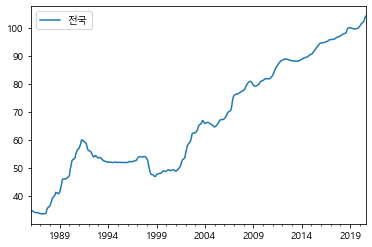

In [57]:
# matplotlib 불러오고 한글폰트 설정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# 맥 OS인 경우 위 두 줄을 입력하지 않고 아래 코드를 입력하면 된다.
# rc('font', family='AppleGothc')
plt.rcParams['axes.unicode_minus'] = False

# 종합 매매가격지수 그래프 그리기
path = r'데이터\★(월간)KB주택가격동향_시계열(2020.08).xlsx'
data_type = '매매종합'
new_data = KBpriceindex_preprocessing(path, data_type)
new_data['전국']['전국'].plot(legend='전국')
plt.show()

### 특정 지역의 원하는 시간대의 데이터로 종합 매매 가격 지수 그래프

모든 시간대가 아니라 2002년 이후라던지, 최근 10년이라던지 시간 축을 조정하여 그래프를 그린다.

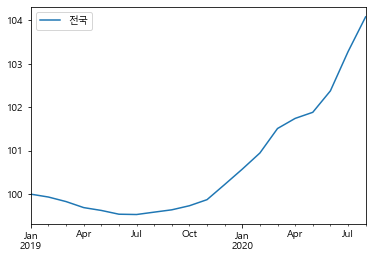

In [58]:
# 특정 지역에 원하는 시간대의 데이터를 가져와 그래프 그리기

# 2019년 1월 이후부터의 그래프
new_data['전국']['전국']['2019-01':].plot(legend='전국')
plt.show()

### subplot을 이용해 여러 지역을 한번에 비교하기

다른 지역과 비교하기 위해 subplot(행, 열, 순번)

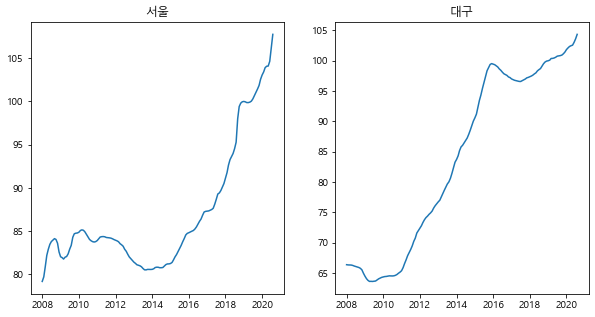

In [59]:
# subplot을 이용해 서울과 대구 그래프 그리기

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('서울')
plt.plot(new_data['서울']['서울']['2008-01':])

plt.subplot(1, 2, 2)
plt.title('대구')
plt.plot(new_data['대구']['대구']['2008-01':])

plt.show()



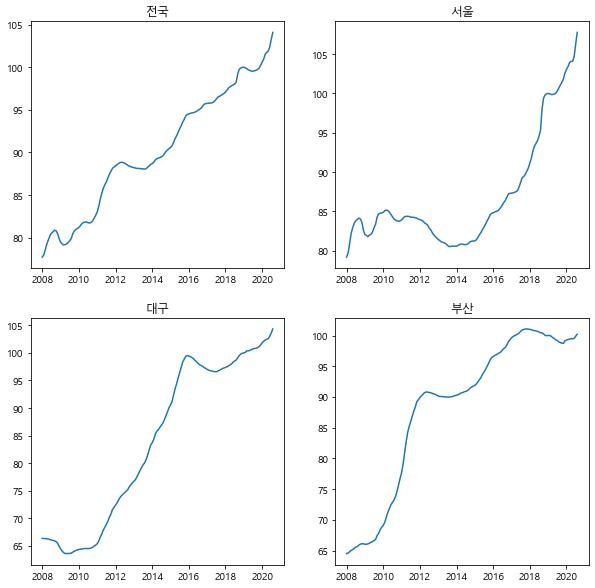

In [62]:
# for 문을 이용해 여러개의 subplot을 그려보자.

spots = '전국 서울 대구 부산'
start_date = '2008-1'
spot_list = spots.split(' ')
num_row = int((len(spot_list)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    plt.plot(new_data[spot][spot][start_date:])
    
plt.show()

### 구-군 지역의 종합 매매 가격지수 그래프

시-도 안에서 구 단위,로 구분)까지 지역을 세분화해 서울시안에서 마포구로 한정해서 가격지수를 표시한다. [시-도][구]와 같은 데이터를 subplot으로 구현한다.

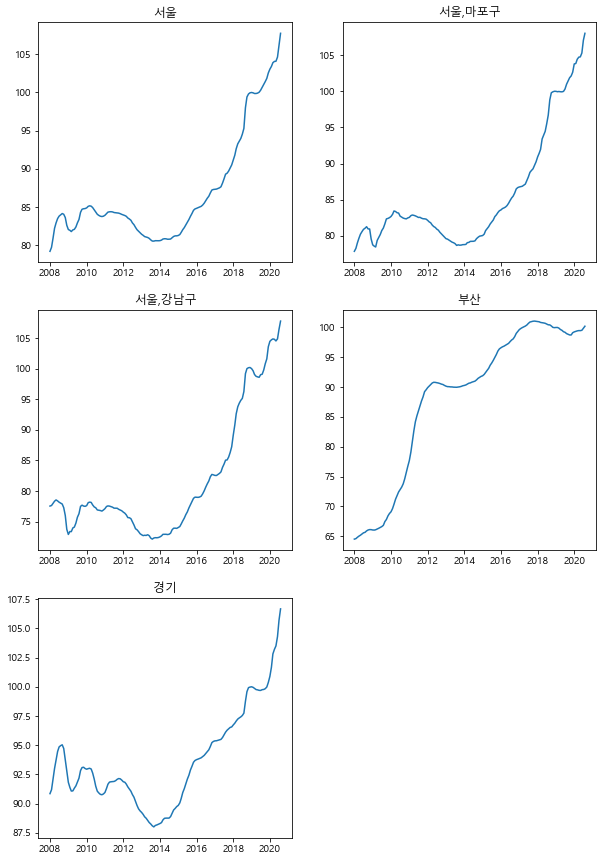

In [64]:
# 시-도 안의 구 지역 가격지수까지 subplot으로 그래프 그리기
spots = '서울 서울,마포구 서울,강남구 부산 경기'
start_date = '2008-1'
spot_list = spots.split(' ')
num_row = int((len(spot_list)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    if ',' in spot:
        si, gu = spot.split(',')
    else:
        si = gu = spot
    plt.plot(new_data[si][gu][start_date:])
    
plt.show()

### 부동산 가격지수 증감률 구하기

각 지역의 가격지수 움직임을 그래프가 아닌 가격의 증감률로 가격의 움직임을 알아본다.

In [65]:
# 특정 날짜인 전 지역 가격지수 데이터 가져오기

new_data.loc['2020-1-1'] #loc : 행 , iloc : 열

전국    전국      100.576
서울    서울      103.056
      강북      102.687
      강북구     103.382
      광진구     102.526
               ...   
경남    김해      94.5887
      통영         None
제주도   제주도        None
      서귀포     97.0367
기타지방  기타지방    97.5658
Name: 2020-01-01 00:00:00, Length: 186, dtype: object

In [68]:
# 두 날짜 사이의 부동산 가격지수 증감률 구하기

(new_data.loc['2020-1-1'] - new_data.loc['2016-1-1']) / new_data.loc['2016-1-1'] * 100 

전국    전국      6.40082
서울    서울      21.4963
      강북      19.1436
      강북구     11.2515
      광진구     15.3536
               ...   
경남    김해     -13.6796
      통영          NaN
제주도   제주도         NaN
      서귀포     1.09201
기타지방  기타지방   -5.10185
Length: 186, dtype: object

In [70]:
# 가격지수 증감률 정렬하기

diff = (new_data.loc['2020-1-1'] - new_data.loc['2016-1-1']) / new_data.loc['2016-1-1'] * 100
diff.sort_values()

경남   성산구   -19.6505
     의창구   -14.9381
     김해    -13.6796
울산   북구    -13.5543
경북   구미    -13.2276
             ...   
     김천         NaN
경남   양산         NaN
     거제         NaN
     통영         NaN
제주도  제주도        NaN
Length: 186, dtype: object

In [78]:
# 누락된 지역 삭제 및 상위, 하위 10개만 출력

diff = ((new_data.loc['2020-1-1'] - new_data.loc['2016-1-1']) / new_data.loc['2016-1-1'] * 100).dropna()
print('하위 10 개')
print(diff.sort_values()[:10])
print(' ')
print('상위 10개')
print(diff.sort_values(ascending=False)[:10])

하위 10 개
경남  성산구   -19.6505
    의창구   -14.9381
    김해    -13.6796
울산  북구    -13.5543
경북  구미    -13.2276
울산  동구    -12.8805
경남  창원    -12.8257
경북  북구    -11.8666
충북  상당구   -11.4632
경남  진해구   -11.0201
dtype: object
 
상위 10개
경기  분당구     35.4541
서울  영등포구    34.5259
    강남구     32.2399
    송파구      27.306
경기  광명      26.8217
서울  서초구     26.3822
    양천구     26.1126
    용산구     25.0477
    마포구     24.1542
    서대문구    23.9143
dtype: object


### 부동산 가격지수 증감률을 시각화

가격지수의 증감률의 크기를 지역명의 값으로 서로 비교할 때는 막대그래프가 의미를 전달하는데 효과적이다.

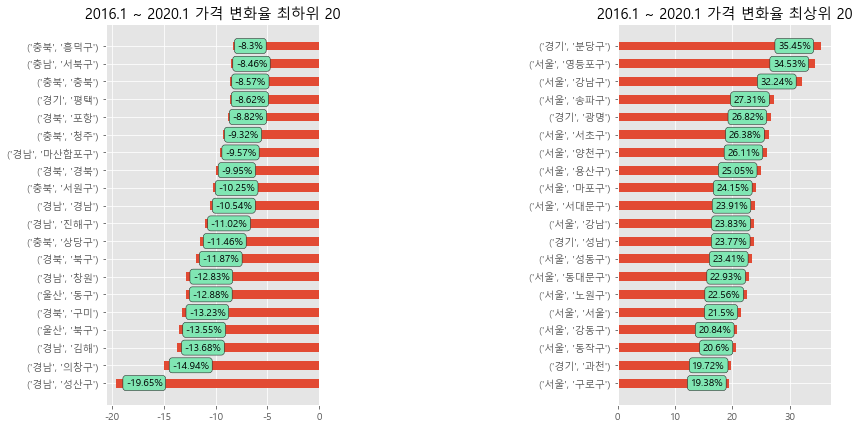

In [80]:
# 가격지수의 증감률을 막대그래프로 시각화

import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
style.use('ggplot')

fig = plt.figure(figsize=(13,7))
ind = np.arange(20)

ax = fig.add_subplot(1, 3, 1)
plt.title('2016.1 ~ 2020.1 가격 변화율 최하위 20')
rects = plt.barh(ind, diff.sort_values()[:20].values, align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[:20].index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(),
           rect.get_y() + rect.get_height() / 2.0,
           str(round(diff.sort_values()[:20].values[i], 2)) + '%',
           ha='left', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))
    
ax2 = fig.add_subplot(1, 3, 3)
plt.title('2016.1 ~ 2020.1 가격 변화율 최상위 20')
rects2 = plt.barh(ind, diff.sort_values()[-20:].values, align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[-20:].index)
for i, rect in enumerate(rects2):
    ax2.text(0.95 * rect.get_width(),
            rect.get_y() + rect.get_height() / 2.0,
            str(round(diff.sort_values()[-20:].values[i],2)) + '%',
            ha='right', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))
    
plt.show()

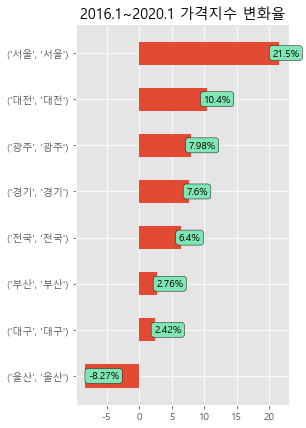

In [76]:
# 특정 지역만 선택해서 가격지수 증감률을 막대그래프로 시각화
loca = '전국 서울 부산 경기 대구 광주 울산 대전'

temp_list = loca.split(" ")
loca_list = []
for temp in temp_list:
    if ',' in temp:
        temp_split = temp.split(",")
        loca_list.append((temp_split[0], temp_split[1]))
    else:
        loca_list.append((temp, temp))
        
diff = ((new_data.loc['2020-1-1', loca_list] - new_data.loc['2016-1-1', loca_list]) / new_data.loc['2016-1-1',
                                        loca_list] * 100).sort_values()

num = len(loca_list)
fig = plt.figure(figsize=(13,7))
ind = np.arange(num)

ax = fig.add_subplot(1, 3, 1)
plt.title('2016.1~2020.1 가격지수 변화율')
rects = plt.barh(ind, diff.head(num).values, align='center', height=0.5)
plt.yticks(ind, diff.head(num).index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(round(diff.head(20).values[i], 2))
            + '%', ha='left', va='center', bbox=dict(boxstyle="round", fc=(0.5, 0.9, 0.7), ec="0.1"))
    
plt.show()